# NAME: AKSHAT GOYAL

# Data Science and Business Analytics Internship at the Sparks Foundation.

# Goal : Create the Decision Tree classifier and visualize it graphically.

In [4]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [5]:
A=pd.read_csv("C:/Users/Lenovo/Downloads/iris.csv")

In [6]:
A.head()

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [7]:
# dropping the unrequired columns
A=A.drop(labels=["Unnamed: 0"],axis=1)

In [8]:
A.head(2)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


# Data Exploration

In [10]:
A.shape

(150, 5)

In [11]:
A.describe() #statistics of the data

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Checking for Missing Values inside the data

In [13]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     150 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null float64
Species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [14]:
import missingno as mo

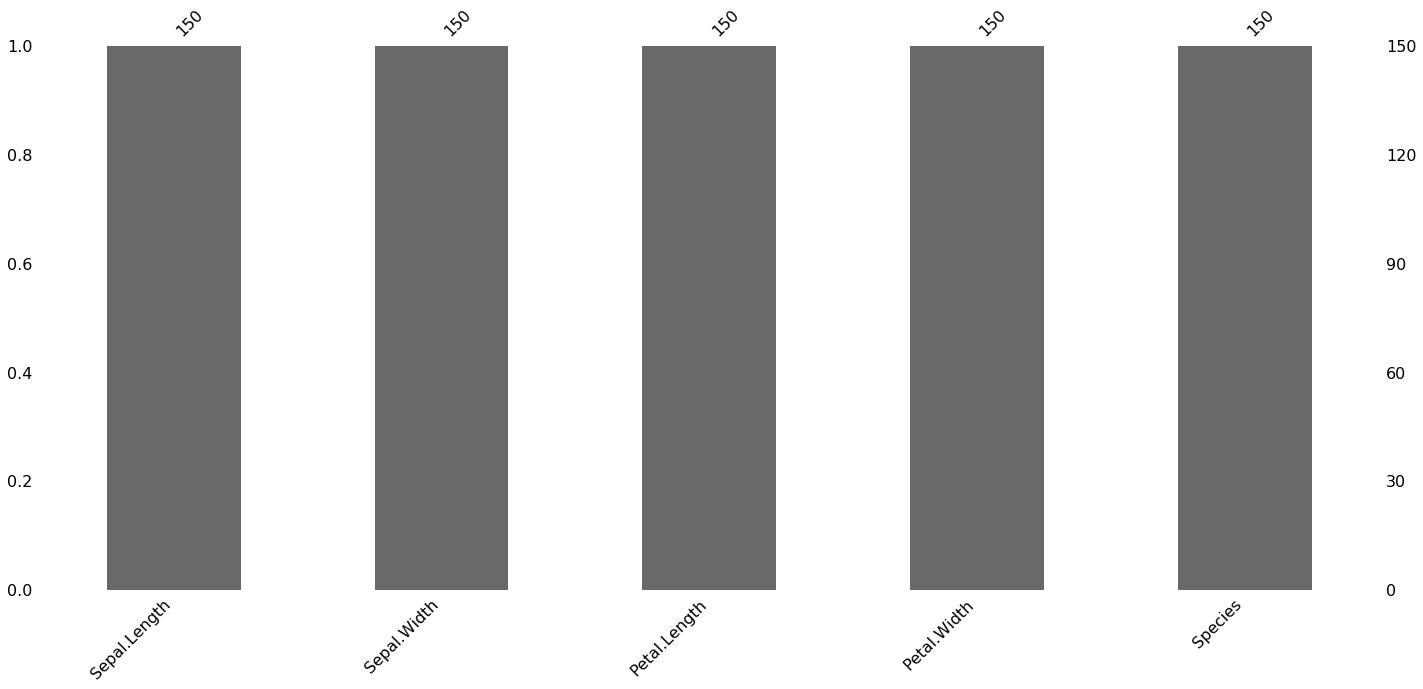

In [15]:
mo.bar(A)
plt.show()

In [16]:
# from thhe the above plot we could clearly conclude that their is nio missing
# values inside the data

# Detecting the Outliers & Handling them

In [18]:
# Detecting outlier
Q1= A.quantile(0.25)
Q3= A.quantile(0.75)
IQR= Q3 - Q1
print(IQR)

Sepal.Length    1.3
Sepal.Width     0.5
Petal.Length    3.5
Petal.Width     1.5
dtype: float64


In [19]:
Lower_Whisker= Q1 - 1.5*IQR
Upper_Whisker= Q3 + 1.5*IQR
print(Lower_Whisker,Upper_Whisker)

Sepal.Length    3.15
Sepal.Width     2.05
Petal.Length   -3.65
Petal.Width    -1.95
dtype: float64 Sepal.Length     8.35
Sepal.Width      4.05
Petal.Length    10.35
Petal.Width      4.05
dtype: float64


In [20]:
print(Upper_Whisker)

Sepal.Length     8.35
Sepal.Width      4.05
Petal.Length    10.35
Petal.Width      4.05
dtype: float64


In [21]:
print(Lower_Whisker)

Sepal.Length    3.15
Sepal.Width     2.05
Petal.Length   -3.65
Petal.Width    -1.95
dtype: float64


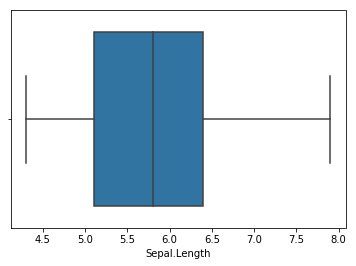

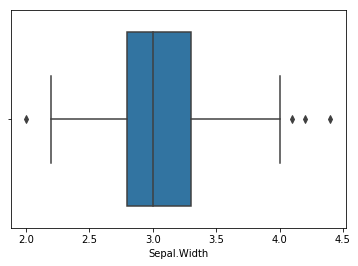

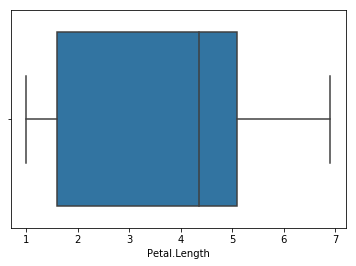

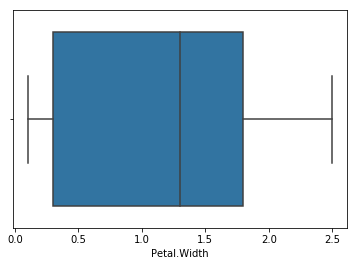

In [22]:
for i in A.columns:
    if(A[i].dtypes!="object"):
        sb.boxplot(A[i])
        plt.show()

# Exploratory Data Analysis

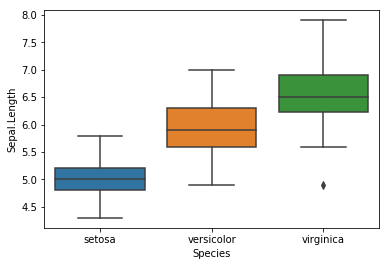

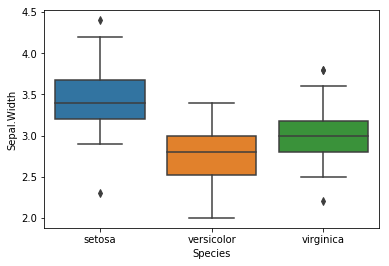

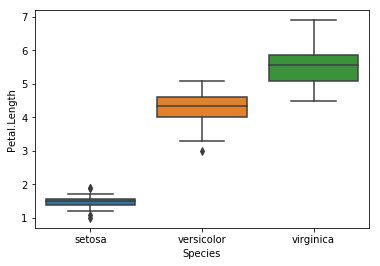

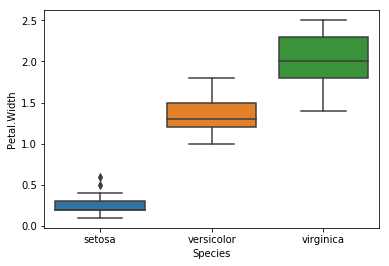

In [24]:
for i in A.columns:
    if A[i].dtypes !="object":
        sb.boxplot(A["Species"],A[i])
        plt.show()
    else:
        pass

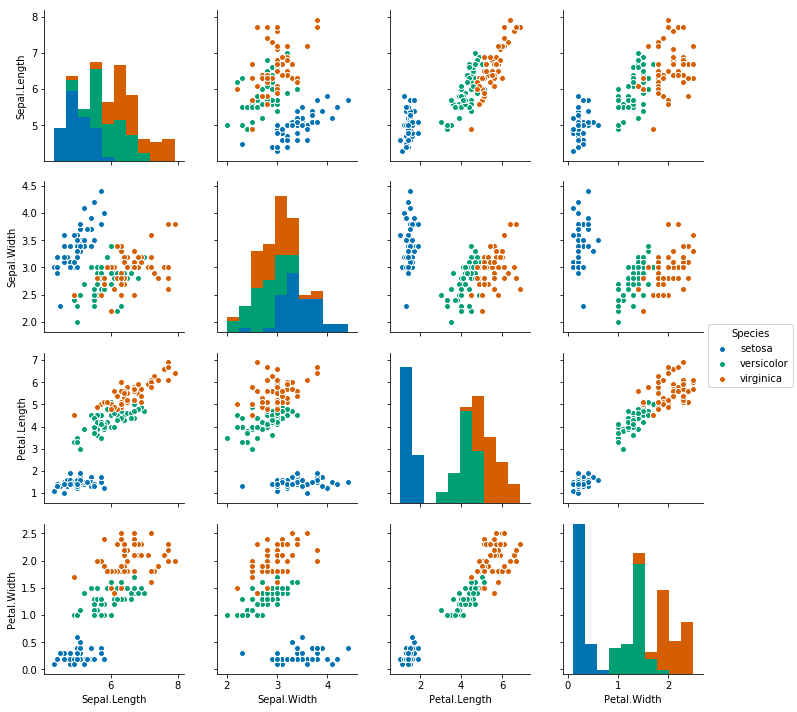

In [25]:
sb.pairplot(data=A,hue="Species",palette="colorblind")

In [26]:
A.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


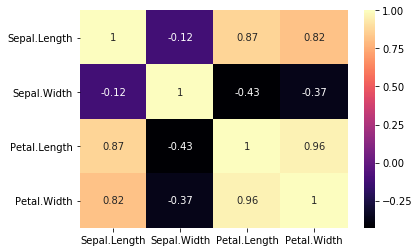

In [27]:
sb.heatmap(A.corr(),annot=True,cmap='magma')
plt.show()

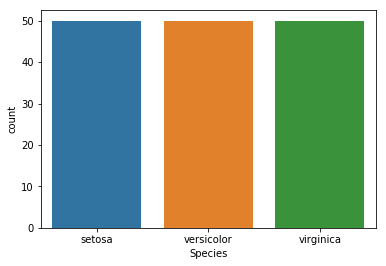

In [28]:
sb.countplot(A.Species)
plt.show()

# Model Prepration

In [30]:
X= A.drop(labels=["Species"],axis=1)
Y= A["Species"]
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=30)

In [31]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion="entropy",random_state=30)
model=dtc.fit(xtrain,ytrain)
pred= model.predict(xtest)

In [32]:
from sklearn.metrics import accuracy_score
print("The Accuracy Score of the model is",accuracy_score(ytest,pred))

The Accuracy Score of the model is 0.9333333333333333


In [35]:
from sklearn.tree import export_graphviz
export_graphviz(dtc,out_file="D:/Dummy/Grip_iris")

In [ ]:
import pydotplus as pdp
graph = pdp.graph_from_dot_file("/Users/Manan/dot_data1.dot")
from IPython.display import Image
#Image(graph.create_jpg())

# Model Evaluation

In [41]:
from sklearn.metrics import classification_report
print('Classification Report\n')
print(classification_report(ytest,pred))

Classification Report

             precision    recall  f1-score   support

     setosa       1.00      1.00      1.00        12
 versicolor       0.89      0.89      0.89         9
  virginica       0.89      0.89      0.89         9

avg / total       0.93      0.93      0.93        30



# Conclusion